In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats

%matplotlib inline

In [94]:
data = pd.read_csv('flats_for_clustering.tsv', sep='\t')

#Check for Nan values
for i in data.columns.tolist():
    print(data[i].isna().sum(), i)

#Check for str values
for i in data.columns.tolist():
    print(data[i].unique())

#Change str values

data['Piętro'] = data['Piętro'].replace(['parter', 'niski parter'], 0)
data.loc[data['Piętro'] == 'poddasze', 'Piętro'] = data['Liczba pięter w budynku'] + 1

#Change Nan values

data['Liczba pięter w budynku'].fillna(data['Piętro'].where(pd.notna(data['Piętro']), data['Liczba pięter w budynku'].mean()), inplace=True)
data['Piętro'].fillna(data['Liczba pięter w budynku'], inplace=True)

#Change type of values

data['Piętro'] = data['Piętro'].astype(int)
data['Liczba pięter w budynku'] = data['Liczba pięter w budynku'].astype(int)

0 cena
0 Powierzchnia w m2
0 Liczba pokoi
150 Liczba pięter w budynku
579 Piętro
[290386 450000 375000 ... 329900 695303 127900]
[   46    59    79    63    90    66    32    38    68    43   185    64
   165    71    73    51    70    48    42    33   203    88    41    31
    45    62    60   295    53    84   170    56    47   228    44    67
    49    37    87    36    55    57   118    65    30    28   230    54
    52    95    50    26   171   282    77    40   150   300    39   145
   370   140   225    29    61   135    27   270   177    85    92   132
    75   200    74   219   220    96   235    20   153   318   104    58
    72   117   189    81   111    35   280   141   195   120   250    97
   154   114    76   287    34   180   160   176   148    98   217    86
   260   198    78   183    80   163    82   100   156   320    89   103
   159   125   340   149   175   237   110   182   186   106   233   197
   136   162   157   240   211    83   196    69   102    91   108  

Number of rows for ax1 : 4938
Number of rows for ax2 : 4936
Number of rows for ax3 : 4110


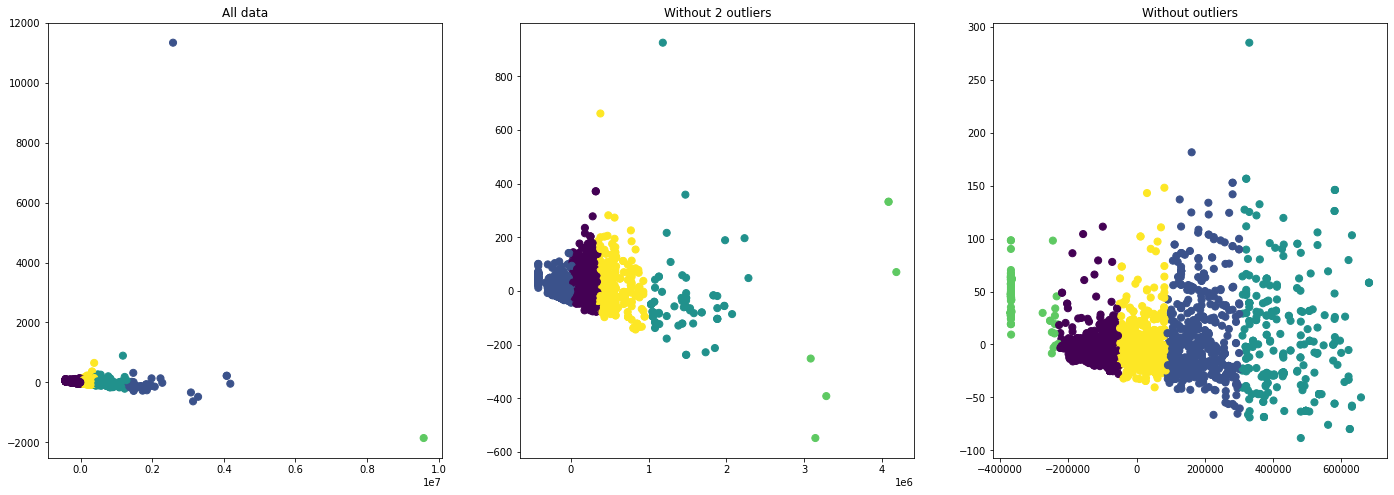

In [95]:
#Removing 2 biggest outliers in data
#That is a row where 'cena' is equal to 10000000 and 'Powierzchnia w m2' is equal to 11930
data_without_2_outliers = data[data['Powierzchnia w m2'] != 11930]
data_without_2_outliers = data_without_2_outliers[data_without_2_outliers['cena'] != 10000000]
#Removing outliers using z-score
data_without_outliers = data[(np.abs(stats.zscore(data)) < 2).all(axis=1)]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

for i, df in enumerate([data, data_without_2_outliers, data_without_outliers]):

    X = df.values
    
    print(f'Number of rows for ax{i+1} : {X.shape[0]}')

    #KMeans
    kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
    clusters = kmeans.predict(X)

    #PCA
    pca = PCA(n_components=2)
    pca.fit(X)
    X_pca = pca.transform(X)

    if i == 0:
        ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=50, cmap='viridis')
        ax1.set_title('All data')

    elif i == 1:
        ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=50, cmap='viridis')
        ax2.set_title('Without 2 outliers')

    elif i == 2:
        ax3.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=50, cmap='viridis')
        ax3.set_title('Without outliers')

